In [5]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install gensim

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [15]:
pip install nltk

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install beautifulsoup4

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [19]:
pip install requests

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [21]:
pip install lxml

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [23]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\İnsanazor\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\İnsanazor\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\İnsanazor\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\İnsanazor\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [25]:
# Bu kod parçası, train.json ve test.json adlı iki JSON dosyasını okur ve
# her bir yemek tarifinin başlığını, malzemelerini ve talimatlarını ekrana yazdırır.
# İlk 2 yemek tarifi gösterilmekte.

import json
import os

# Dosya yolları
train_path = os.path.expanduser(r"data\train.json")
test_path = os.path.expanduser(r"data\test.json")

# Dosyaları yükleme
with open(train_path, "r", encoding="utf-8") as f:
    train_data = json.load(f)

with open(test_path, "r", encoding="utf-8") as f:
    test_data = json.load(f)

# İlk 2 örneği yazdırma kodu
for i, recipe in enumerate(train_data[:2]):
    print(f"\nTarif {i+1}:")
    print("Başlık:", recipe.get("title", "Yok"))
    print("Malzemeler:", recipe.get("ingredients", "Yok"))
    print("Talimatlar:", recipe.get("instructions", "Yok"))



Tarif 1:
Başlık: Yok
Malzemeler: ['romaine lettuce', 'black olives', 'grape tomatoes', 'garlic', 'pepper', 'purple onion', 'seasoning', 'garbanzo beans', 'feta cheese crumbles']
Talimatlar: Yok

Tarif 2:
Başlık: Yok
Malzemeler: ['plain flour', 'ground pepper', 'salt', 'tomatoes', 'ground black pepper', 'thyme', 'eggs', 'green tomatoes', 'yellow corn meal', 'milk', 'vegetable oil']
Talimatlar: Yok


In [27]:
# Bu kod, verilen yemek tarifinin malzeme listesini alır, metni işler 
# stopword'leri çıkarıp lemmatize ederek token'lar elde eder.

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    tokens = word_tokenize(text.lower())  # Küçük harf ve tokenizasyon
    tokens = [t for t in tokens if t.isalpha()]  # Sadece harflerden oluşanları al
    tokens = [t for t in tokens if t not in stop_words]  # Stopword'leri çıkar
    tokens = [lemmatizer.lemmatize(t) for t in tokens]  # Lemmatize et
    return tokens

# Örnek tarifin açıklaması
example_ingredients = train_data[0]["ingredients"]
joined_text = " ".join(example_ingredients)
processed_tokens = preprocess(joined_text)

print(processed_tokens[:20])  # İlk 20 kelimeyi görelim


['romaine', 'lettuce', 'black', 'olive', 'grape', 'tomato', 'garlic', 'pepper', 'purple', 'onion', 'seasoning', 'garbanzo', 'bean', 'feta', 'cheese', 'crumbles']


In [29]:
# Bu kod, yemek tariflerinin malzemelerini işleyerek her tarifin
# farklı versiyonlarını oluşturur ve bunları CSV dosyalarına kaydeder.

import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords

lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
stop_words = set(stopwords.words("english"))

def preprocess_all(data):
    lemmatized_list = []
    stemmed_list = []
    raw_texts = []
    
    for recipe in data:
        ingredients = recipe["ingredients"]
        text = " ".join(ingredients)
        raw_texts.append(text)
        
        tokens = word_tokenize(text.lower())
        tokens = [t for t in tokens if t.isalpha()]
        tokens = [t for t in tokens if t not in stop_words]
        
        lemmatized = [lemmatizer.lemmatize(t) for t in tokens]
        stemmed = [stemmer.stem(t) for t in tokens]
        
        lemmatized_list.append(" ".join(lemmatized))
        stemmed_list.append(" ".join(stemmed))
        
    return lemmatized_list, stemmed_list, raw_texts

lemmatized_recipes, stemmed_recipes, raw_recipes = preprocess_all(train_data)

# CSV kaydet
pd.DataFrame({"text": lemmatized_recipes}).to_csv("lemmatized_data.csv", index=False)
pd.DataFrame({"text": stemmed_recipes}).to_csv("stemmed_data.csv", index=False)
pd.DataFrame({"text": raw_recipes}).to_csv("raw_data.csv", index=False)

print("✔️ Lemmatized, stemmed ve ham veriler CSV olarak kaydedildi.")


✔️ Lemmatized, stemmed ve ham veriler CSV olarak kaydedildi.


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\İnsanazor\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\İnsanazor\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


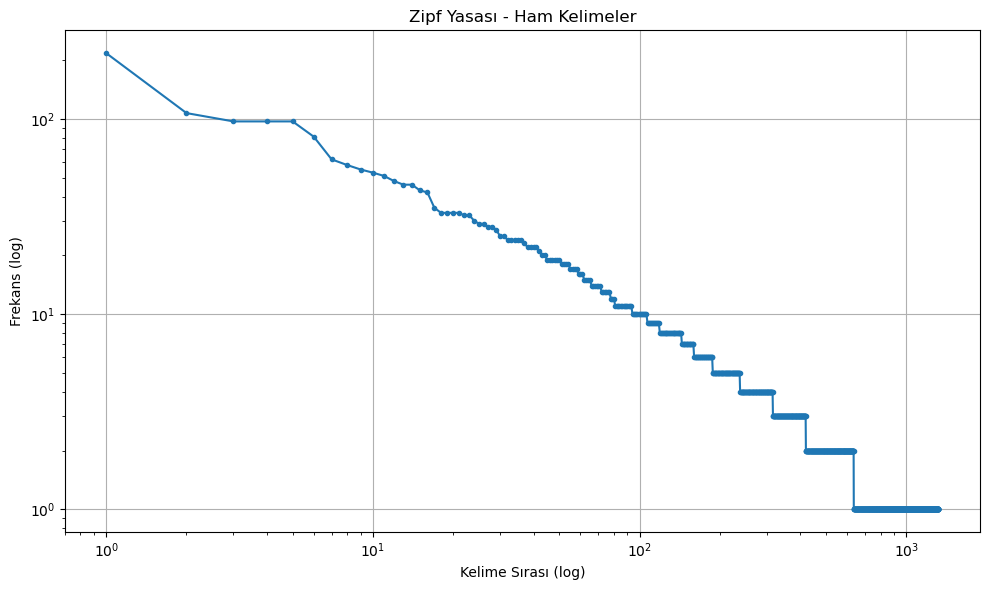

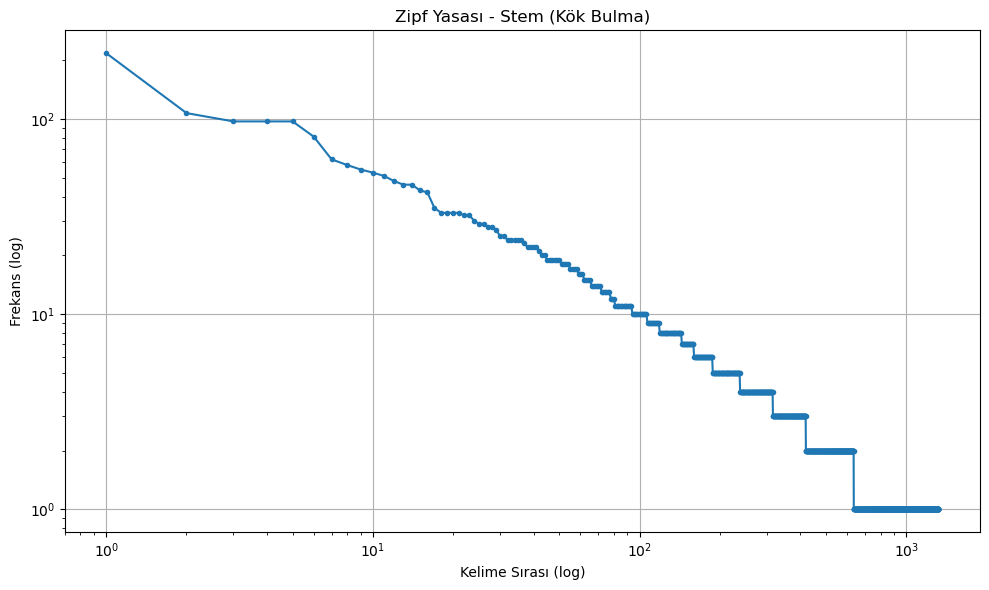

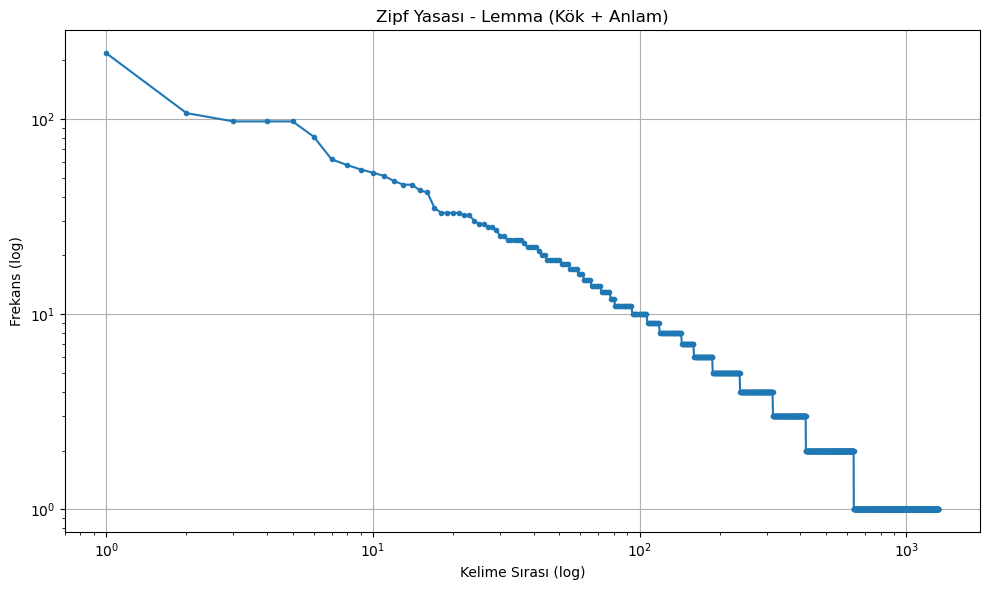

In [31]:
# Bu kod, Zipf yasasına dayalı olarak farklı işlenmiş veri setlerinin frekanslarını görselleştirir.
# Zipf yasası, en yaygın kelimelerin (ya da öğelerin) sıralamasının genellikle logaritmik bir dağılım gösterdiğini belirtir.

import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import pandas as pd
from nltk.stem import WordNetLemmatizer, PorterStemmer
import nltk

nltk.download('wordnet')
nltk.download('omw-1.4')

# Veri yükle
df = pd.read_json(r"data/train.json")
df = df.head(500)
ingredients = df['ingredients']
all_ingredients = [ingredient.lower() for sublist in ingredients for ingredient in sublist]

# Ham frekans
raw_freq = Counter(all_ingredients)
raw_common = raw_freq.most_common()
raw_ranks = np.arange(1, len(raw_common) + 1)
raw_freqs = np.array([freq for word, freq in raw_common])

# Stem
stemmer = PorterStemmer()
stemmed_words = [stemmer.stem(word) for word in all_ingredients]
stem_freq = Counter(stemmed_words)
stem_common = stem_freq.most_common()
stem_ranks = np.arange(1, len(stem_common) + 1)
stem_freqs = np.array([freq for word, freq in stem_common])

# Lemma
lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(word) for word in all_ingredients]
lemma_freq = Counter(lemmatized_words)
lemma_common = lemma_freq.most_common()
lemma_ranks = np.arange(1, len(lemma_common) + 1)
lemma_freqs = np.array([freq for word, freq in lemma_common])

# Ham Zipf Grafiği
plt.figure(figsize=(10, 6))
plt.loglog(raw_ranks, raw_freqs, marker=".")
plt.title("Zipf Yasası - Ham Kelimeler")
plt.xlabel("Kelime Sırası (log)")
plt.ylabel("Frekans (log)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Stem Zipf Grafiği
plt.figure(figsize=(10, 6))
plt.loglog(stem_ranks, stem_freqs, marker=".")
plt.title("Zipf Yasası - Stem (Kök Bulma)")
plt.xlabel("Kelime Sırası (log)")
plt.ylabel("Frekans (log)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Lemma Zipf Grafiği
plt.figure(figsize=(10, 6))
plt.loglog(lemma_ranks, lemma_freqs, marker=".")
plt.title("Zipf Yasası - Lemma (Kök + Anlam)")
plt.xlabel("Kelime Sırası (log)")
plt.ylabel("Frekans (log)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [33]:
# verilen bir metinden stopword temizleme işlemi yapar.

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# İngilizce stop word'leri al
stop_words = set(stopwords.words('english'))

# Örnek metin
text = "The quick brown fox jumps over the lazy dog"
tokens = text.split()  # Kelimelere ayır

# Stop word'leri temizleme
filtered_words = [word for word in tokens if word.lower() not in stop_words]

print("Stop word removal:")
print(f"Önce: {tokens}")
print(f"Sonra: {filtered_words}")


Stop word removal:
Önce: ['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']
Sonra: ['quick', 'brown', 'fox', 'jumps', 'lazy', 'dog']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\İnsanazor\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
# Daha önce stopword'leri çıkarılmış metni tokenize ederek, kelimelere ayırma işlemi yapar
from nltk.tokenize import word_tokenize
nltk.download('punkt')

# Tokenize etme
tokens = word_tokenize(" ".join(filtered_words))

print("Tokenization:")
print(f"Önce: {filtered_words}")
print(f"Sonra: {tokens}")


Tokenization:
Önce: ['quick', 'brown', 'fox', 'jumps', 'lazy', 'dog']
Sonra: ['quick', 'brown', 'fox', 'jumps', 'lazy', 'dog']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\İnsanazor\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [37]:
# Küçük harfe dönüştürme
tokens_lower = [word.lower() for word in tokens]

print("Lowercasing:")
print(f"Önce: {tokens}")
print(f"Sonra: {tokens_lower}")


Lowercasing:
Önce: ['quick', 'brown', 'fox', 'jumps', 'lazy', 'dog']
Sonra: ['quick', 'brown', 'fox', 'jumps', 'lazy', 'dog']


In [39]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Lemmatize etme
lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens_lower]

print("Lemmatization:")
print(f"Önce: {tokens_lower}")
print(f"Sonra: {lemmatized_tokens}")


Lemmatization:
Önce: ['quick', 'brown', 'fox', 'jumps', 'lazy', 'dog']
Sonra: ['quick', 'brown', 'fox', 'jump', 'lazy', 'dog']


In [49]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

# Stem etme
stemmed_tokens = [stemmer.stem(word) for word in tokens_lower]

print("Stemming:")
print(f"Önce: {tokens_lower}")
print(f"Sonra: {stemmed_tokens}")


Stemming:
Önce: ['quick', 'brown', 'fox', 'jumps', 'lazy', 'dog']
Sonra: ['quick', 'brown', 'fox', 'jump', 'lazi', 'dog']


In [51]:
# BeautifulSoup kullanarak HTML etiketlerini temizler ve sadece metin içeriğini çıkarır.

from bs4 import BeautifulSoup

# HTML etiketlerini temizleme (örneğin bir metnin içinde varsa)
text_with_html = "<html><body>This is a <b>test</b> text.</body></html>"
soup = BeautifulSoup(text_with_html, "html.parser")
clean_text = soup.get_text()

print("HTML Etiket Temizleme:")
print(f"Önce: {text_with_html}")
print(f"Sonra: {clean_text}")


HTML Etiket Temizleme:
Önce: <html><body>This is a <b>test</b> text.</body></html>
Sonra: This is a test text.


In [81]:
# Bu kod, verilen ingredients listesi üzerinde
# tokenization, stemming ve lemmatization işlemleri gerçekleştiriyor 
# bu işlemler sonrası kelime sayılarındaki değişimi hesaplıyor. 

import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('wordnet')

# Bu senin tarif listelerin (dilersen kendi verinle değiştir)
ingredients = [
    "1 cup of chopped tomatoes and 2 tablespoons of olive oil",
    "freshly ground black pepper and salt to taste",
    "3 cloves of garlic minced and 1 onion chopped"
]

tokenized_ingredients = [word_tokenize(ingredient.lower()) for ingredient in ingredients]

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

stemmed_ingredients = [[stemmer.stem(word) for word in ingredient] for ingredient in tokenized_ingredients]
lemmatized_ingredients = [[lemmatizer.lemmatize(word) for word in ingredient] for ingredient in tokenized_ingredients]

# Orijinal veri setindeki toplam kelime sayısı
original_word_count = sum([len(ingredient) for ingredient in tokenized_ingredients])

# Stemmed ve Lemmatized veri setlerindeki toplam kelime sayısı
stemmed_word_count = sum([len(ingredient) for ingredient in stemmed_ingredients])
lemmatized_word_count = sum([len(ingredient) for ingredient in lemmatized_ingredients])

print(f"Orijinal veri boyutu (kelime sayısı): {original_word_count}")
print(f"Stemmed veri boyutu (kelime sayısı): {stemmed_word_count}")
print(f"Lemmatized veri boyutu (kelime sayısı): {lemmatized_word_count}")

# Ne kadar veri çıkarıldığını hesapla
print(f"Stemmed işleminde çıkarılan kelimeler: {original_word_count - stemmed_word_count}")
print(f"Lemmatized işleminde çıkarılan kelimeler: {original_word_count - lemmatized_word_count}")


Orijinal veri boyutu (kelime sayısı): 28
Stemmed veri boyutu (kelime sayısı): 28
Lemmatized veri boyutu (kelime sayısı): 28
Stemmed işleminde çıkarılan kelimeler: 0
Lemmatized işleminde çıkarılan kelimeler: 0


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\İnsanazor\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\İnsanazor\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [83]:
# metin verisi üzerinde TF-IDF vektörleştirme işlemi yapmak için gerekli olan kütüphaneleri ve adımları var.

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\İnsanazor\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [85]:
# Veri al işle
df = pd.read_json("data/train.json")
df = df.head(500)  # Örnek olarak sadece ilk 500 satırla çalışalım
ingredients = df['ingredients']

# Lemmatization ve Stemming işlemleri
from nltk.stem import PorterStemmer, WordNetLemmatizer

stemmer = PorterStemmer()
stemmed_ingredients = [
    ' '.join([stemmer.stem(word) for word in ingredient]) for ingredient in ingredients
]

lemmatizer = WordNetLemmatizer()
lemmatized_ingredients = [
    ' '.join([lemmatizer.lemmatize(word) for word in ingredient]) for ingredient in ingredients
]

# Stopwords'i yükle
stop_words = stopwords.words('english')

# TF-IDF için vektörleştirme işlemi
def vectorize_data(data):
    tfidf_vectorizer = TfidfVectorizer(stop_words=stop_words)
    tfidf_matrix = tfidf_vectorizer.fit_transform(data)
    return pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Lemmatized ve Stemmed veriler için TF-IDF hesaplama
tfidf_lemmatized = vectorize_data(lemmatized_ingredients)
tfidf_stemmed = vectorize_data(stemmed_ingredients)

# Sonuçları CSV dosyasına kaydetme
tfidf_lemmatized.to_csv('data/tfidf_lemmatized.csv', index=False)
tfidf_stemmed.to_csv('data/tfidf_stemmed.csv', index=False)

print("TF-IDF işlemi başarıyla tamamlandı ve dosyalar kaydedildi!")


TF-IDF işlemi başarıyla tamamlandı ve dosyalar kaydedildi!


In [87]:
pip install gensim nltk


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [81]:
pip install gensim nltk


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [61]:
pip install --upgrade --force-reinstall gensim nltk


Defaulting to user installation because normal site-packages is not writeable
  Using cached gensim-4.3.3-cp312-cp312-win_amd64.whl.metadata (8.2 kB)
  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl.metadata (61 kB)
  Using cached scipy-1.13.1-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached smart_open-7.1.0-py3-none-any.whl.metadata (24 kB)
  Using cached click-8.1.8-py3-none-any.whl.metadata (2.3 kB)
  Using cached joblib-1.5.0-py3-none-any.whl.metadata (5.6 kB)
  Using cached regex-2024.11.6-cp312-cp312-win_amd64.whl.metadata (41 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached wrapt-1.17.2-cp312-cp312-win_amd64.whl.metadata (6.5 kB)
  Using cached colorama-0.4.6-py2.py3-none-any.whl.metadata (17 kB)
Using cached gensim-4.3.3-cp312-cp312-win_amd64.whl (24.0 MB)
Using cached nltk-3.9.1-py3-none-any.whl (1.5 MB)
Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl (15.5 MB)
Using c

  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.


In [89]:
# Word2Vec modelini kullanarak, verilen lemmatized ve stemmed metinler üzerinde model eğitimi yapar

import gensim
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk

nltk.download('punkt')

lemmatized_sentences = [["apple", "banana", "fruit"], ["orange", "apple", "fruit"]]
stemmed_sentences = [["appl", "banan", "fruit"], ["orang", "appl", "fruit"]]

# Parametreler
parameters = [
    {'model_type': 'cbow', 'window': 2, 'vector_size': 100},
    {'model_type': 'skipgram', 'window': 2, 'vector_size': 100},
    {'model_type': 'cbow', 'window': 4, 'vector_size': 100},
    {'model_type': 'skipgram', 'window': 4, 'vector_size': 100},
    {'model_type': 'cbow', 'window': 2, 'vector_size': 300},
    {'model_type': 'skipgram', 'window': 2, 'vector_size': 300},
    {'model_type': 'cbow', 'window': 4, 'vector_size': 300},
    {'model_type': 'skipgram', 'window': 4, 'vector_size': 300}
]

# Model eğitimi ve kaydetme fonksiyonu
def train_word2vec_model(sentences, model_type, window, vector_size):
    model = Word2Vec(
        sentences,
        vector_size=vector_size,
        window=window,
        sg=1 if model_type == 'skipgram' else 0,  # 1: skipgram, 0: cbow
        min_count=1,  # Minumum frekans
        workers=4  # İşçi sayısı
    )
    return model

# Model eğitimi
for param in parameters:
    print(f"Training {param['model_type']} model with window={param['window']} and vector_size={param['vector_size']}")
    
    # Lemmatized model
    lemmatized_model = train_word2vec_model(lemmatized_sentences, param['model_type'], param['window'], param['vector_size'])
    lemmatized_model.save(f"word2vec_lemmatized_{param['model_type']}_win{param['window']}_dim{param['vector_size']}.model")
    
    # Stemmed model
    stemmed_model = train_word2vec_model(stemmed_sentences, param['model_type'], param['window'], param['vector_size'])
    stemmed_model.save(f"word2vec_stemmed_{param['model_type']}_win{param['window']}_dim{param['vector_size']}.model")


Training cbow model with window=2 and vector_size=100
Training skipgram model with window=2 and vector_size=100
Training cbow model with window=4 and vector_size=100
Training skipgram model with window=4 and vector_size=100
Training cbow model with window=2 and vector_size=300
Training skipgram model with window=2 and vector_size=300
Training cbow model with window=4 and vector_size=300
Training skipgram model with window=4 and vector_size=300


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\İnsanazor\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [93]:
# Gensim modelini yükleme
from gensim.models import Word2Vec

model = Word2Vec.load("word2vec_lemmatized_cbow_win2_dim100.model")

word = "apple"

# Kelimenin en yakın 5 benzer kelimesini bulma
similar_words = model.wv.most_similar(word, topn=5)

# Çıktıları yazdırma
print(f"En yakın 5 kelime '{word}' için:")
for similar_word, score in similar_words:
    print(f"{similar_word}: {score}")


En yakın 5 kelime 'apple' için:
banana: 0.06797593832015991
fruit: -0.010839177295565605
orange: -0.023671656847000122


In [97]:
import time
from gensim.models import Word2Vec

# Word2Vec modelini tanımlama 
model = Word2Vec(sentences=lemmatized_sentences, vector_size=100, window=2, sg=0, min_count=1)

# Kelime dağarcığını oluşturma 
model.build_vocab(lemmatized_sentences)

# Eğitim işlemi
start_time = time.time()
model.train(lemmatized_sentences, total_examples=model.corpus_count, epochs=model.epochs)
training_time = time.time() - start_time

print(f"Eğitim Süresi: {training_time:.2f} saniye")


Eğitim Süresi: 0.01 saniye


In [99]:
import os

# Modelin dosya boyutunu hesaplama
model_size = os.path.getsize("word2vec_lemmatized_cbow_win2_dim100.model") / (1024 * 1024)  # MB cinsinden
print(f"Model Boyutu: {model_size:.2f} MB")


Model Boyutu: 0.01 MB


In [101]:
# Modeli kaydetme
model.save("word2vec_lemmatized_cbow_win2_dim100.model")


In [103]:
from gensim.models import Word2Vec

# Modeli yükle
model = Word2Vec.load("word2vec_lemmatized_cbow_win2_dim100.model")


In [105]:
# Kelime dağarcığındaki ilk 5 kelimeyi yazdır
print(model.wv.index_to_key[:5])


['fruit', 'apple', 'orange', 'banana']


In [107]:
# Kelime dağarcığında kaç kelime var
print(f"Toplam kelime sayısı: {len(model.wv.index_to_key)}")

# İlk 50 kelimeyi yazdıralım
print(model.wv.index_to_key[:50])


Toplam kelime sayısı: 4
['fruit', 'apple', 'orange', 'banana']
